# 2.1 Methods to Visualize a Categorical Variable
Recall that a categorical variable represents a label for data. For example, observations may include the sex or race of an individual. When we have a categorical variable, it's often useful to visualize it with a **frequency distribution**.

## A Frequency Distribution for a Categorical Variable
Suppose an HR department conducts a personality test based on the Myers-Briggs assessment on all of its employees. Suppose we want to visualize the frequency of personalities. One way to do so is using a frequency distribution.

In [1]:
import pandas as pd

# Read data.
myers_briggs = pd.read_csv('Myers_Briggs.csv', index_col=False)
myers_briggs.head(5)

,Employee,Personality
0,1,Diplomat
1,2,Diplomat
2,3,Explorer
3,4,Diplomat
4,5,Diplomat


In [2]:
# Frequency Distribution.
personality_counts = myers_briggs['Personality'].value_counts()
myers_briggs_n = len(myers_briggs)

freq_ = pd.DataFrame({
    'Frequency': personality_counts, 
    'Relative Frequency': personality_counts / myers_briggs_n
})
freq_

,Frequency,Relative Frequency
Personality,,
Explorer,404,0.404
Diplomat,324,0.324
Sentinel,156,0.156
Analyst,116,0.116


## A Bar Chart
First we'll make a vertical **bar chart** which allows us to visualize these frequencies. Each bar's height equals the frequency or relative frequency of the category.

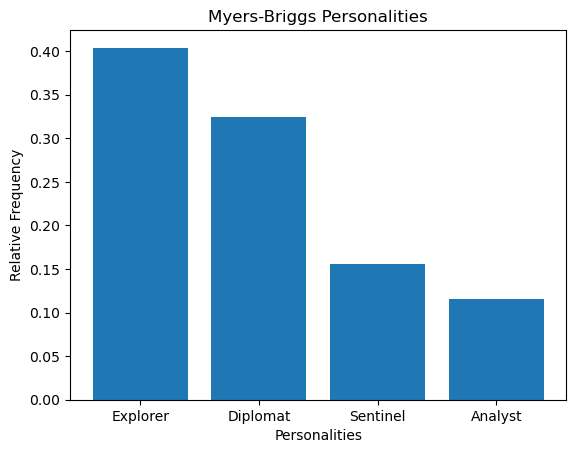

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(personality_counts.index, personality_counts / myers_briggs_n)

ax.set_ylabel('Relative Frequency')
ax.set_xlabel('Personalities')
ax.set_title('Myers-Briggs Personalities')

plt.show()

## A Pie Chart
A pie chart is a circle cut into slices, where each slice visualizes the proportion of a category. We can create a pie chart to visualize our personality tests as well!

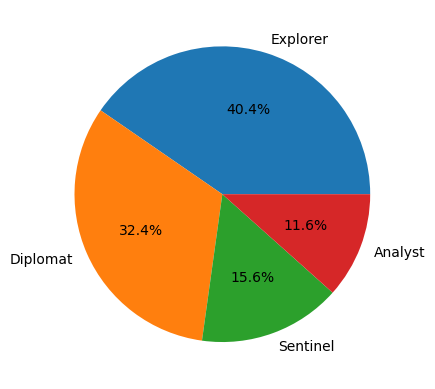

In [4]:
fig, ax_pie = plt.subplots()
ax_pie.pie(personality_counts, labels=personality_counts.index,
           autopct='%1.1f%%')

plt.show()

In [5]:
""" EXAMPLE 2.1

A university conducted a transportation survey
to lower its carbon footprint. The survey was 
distributed to students, faculty, and staff to
learn the patterns of their commutes.
"""

# Read data.
transit_surv = pd.read_csv('Transit_Survey.csv', index_col=False)
transit_surv.head(5)

,Mode of Transportation
0,Bicycle
1,Public_Transit
2,Bicycle
3,Bicycle
4,Public_Transit


In [6]:
# Find frequency.
surv_counts = transit_surv['Mode of Transportation'].value_counts()
surv_freq = pd.DataFrame({'No. Respondents': surv_counts})
surv_freq

,No. Respondents
Mode of Transportation,
Public_Transit,273
Walk,141
Bicycle,111
Drive_Alone,57
Other,18


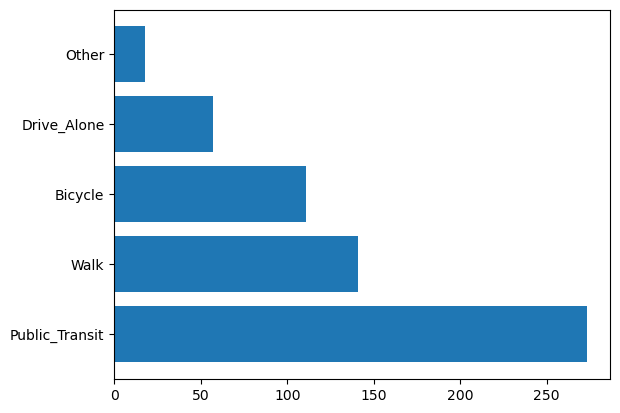

In [7]:
# Bar chart.
fig, surv_bar = plt.subplots()

surv_bar.barh(surv_freq.index, surv_freq['No. Respondents'])

plt.show()

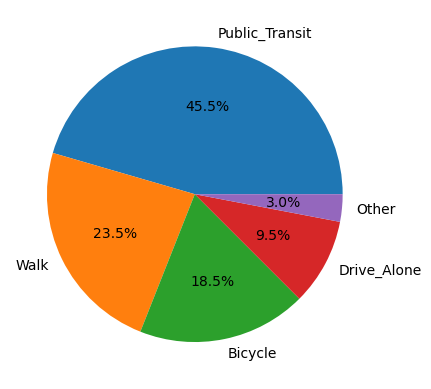

In [8]:
# Pie chart.
fig, surv_pie = plt.subplots()
surv_pie.pie(surv_freq['No. Respondents'], labels=surv_freq.index,
           autopct='%1.1f%%')

plt.show()

### Cautionary Comments When Constructing or Interpreting Charts or Graphs
Note that there are ways to distort information with these graphs. Let's take a look at an example of a misleading verticle axis to illustrate this point.

In [9]:
# Read data.
oil_dat = pd.read_csv('Crude_Oil.csv', index_col=False)
oil_dat.head(5)

,Price Per Barrel
0,91.59
1,89.39
2,90.30
3,88.37
4,88.07


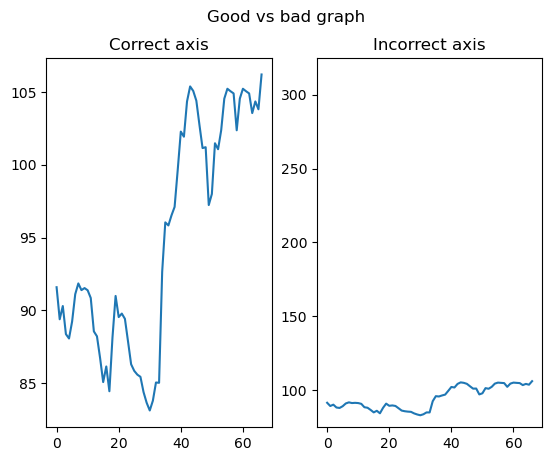

In [10]:
fig, (oil_good, oil_bad) = plt.subplots(1, 2)
fig.suptitle('Good vs bad graph')

oil_good.set_title('Correct axis')
oil_good.plot(oil_dat['Price Per Barrel'])

oil_bad.set_title('Incorrect axis')
oil_bad.plot(oil_dat['Price Per Barrel'])
oil_bad.set_ylim([75, 325])

plt.show()

As we can see, stretching the verticle axis can be deceptive. Here, with the correct axis we can see fluctuations in the price of crude oil that the other graph with a larger axis obfuscates.